# Patient charges || clustering and regression

### The impact of Medicine to your wallet

### Importing libraries



In [12]:
import numpy as np
import pandas as pd

# Matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('../data/raw/insurance.csv')
df.head()

# lest's store the original dataframe in another variable
original_df = df.copy()

In [14]:
%matplotlib inline
sns.set_style(style = 'whitegrid')
sns.set_context(context = 'notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

### Distribution of Medical Charges
* **Types of Distribution**: We have a **right skewed distribution** in wich most patients are being charge between 20000 - 12000.

* **Using Logarithms**: Logarithms helps us have a **normal distribution** which could help us in concepts of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for our predictive modell in the foreseen future. (We will come to this later in the kernel)

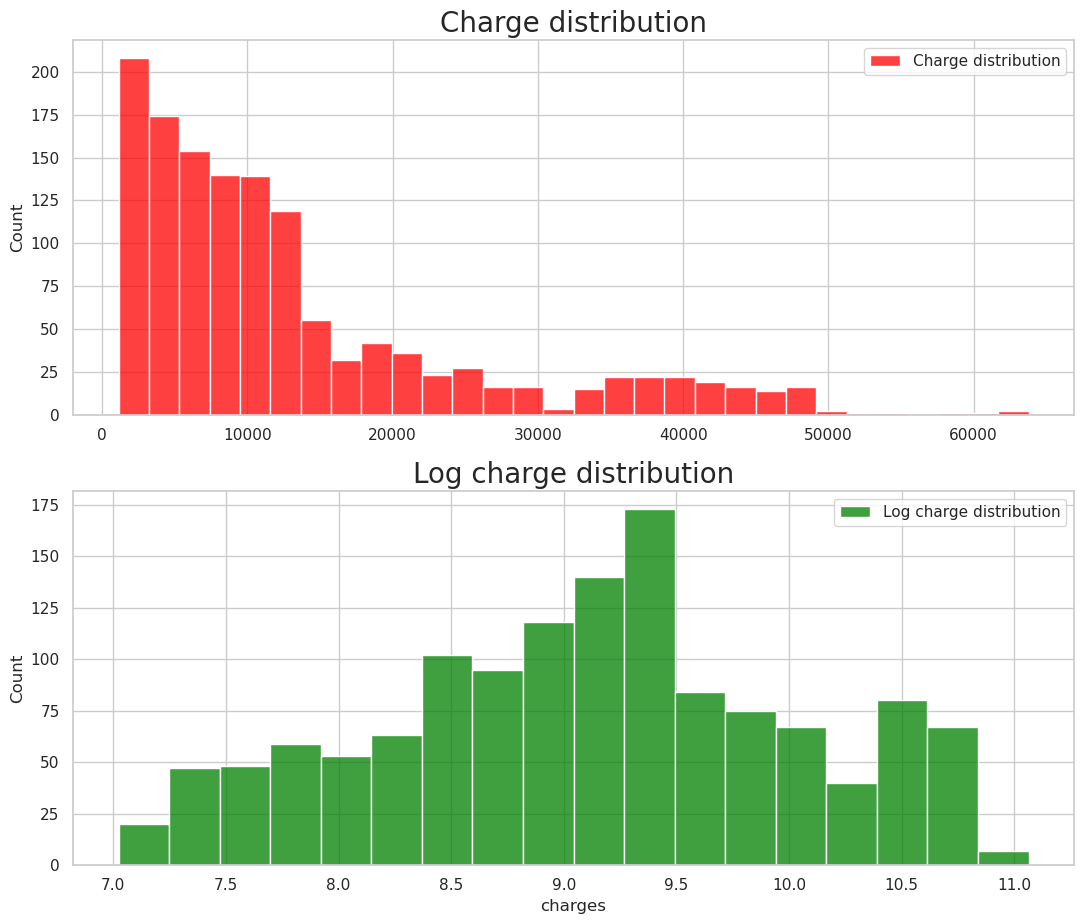

In [15]:
# Determine the distribution of charge 
charge_dist = df['charges'].values
logcharge = np.log(df['charges'])

fig,(ax1,ax2) = plt.subplots(2,1) 

sns.histplot(charge_dist, ax = ax1, color='red', label='Charge distribution') 
ax1.set_title('Charge distribution', fontsize = 20)
ax1.legend(loc='upper right')

sns.histplot(logcharge, ax = ax2, color='green', label='Log charge distribution')
ax2.set_title('Log charge distribution', fontsize = 20)
ax2.legend(loc='upper right')


plt.tight_layout()


### Age Analysis: 

Turning Age into Categorical Variable: 
* **Young Adult**: from 18 - 35
* **Senior Adutl**: from 36 - 55
* **Elder**: 56 or older
* **Share of each category**: Young Adults (42.9%), Senior Adults(41%) and older (16.1%)

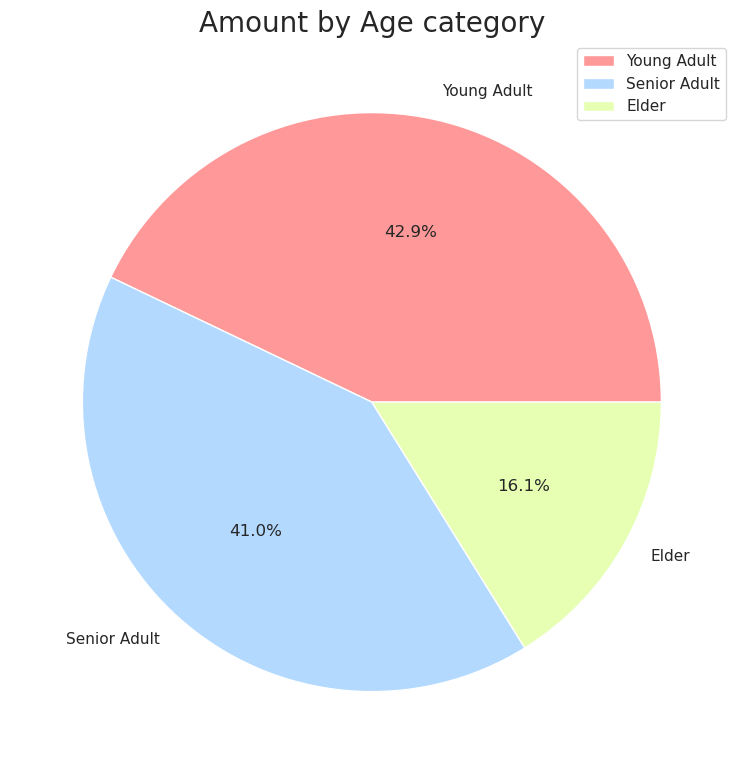

In [16]:
df['age_cat'] = (
    df['age']
    .apply(
        lambda x: 'Young Adult' if 18 <=  x <= 35 else 'Senior Adult' if 35 < x <= 55 else 'Elder'
    )
)

labels = df['age_cat'].unique().tolist()
amount = df['age_cat'].value_counts().tolist()

colors= ["#ff9999", "#b3d9ff", "#e6ffb3"]

plt.pie(amount, labels = labels, autopct = '%1.1f%%', colors=colors);
plt.title('Amount by Age category', fontsize = 20);
plt.legend(loc='upper right');


### Is there a Relationship between BMI and Age
* **BMI frequency**: Most of the BMI frequency is concentrated between 27-33.
* **Correlations**: Age and charges have a correlation of 0.29 while bmi and charges have a correlation of 0.19
* **Relationship between BMI and Age**: The correlation for these two variables is 0.10 which is not that great. Therefore, we can disregar that age has a huge influence on BMI.

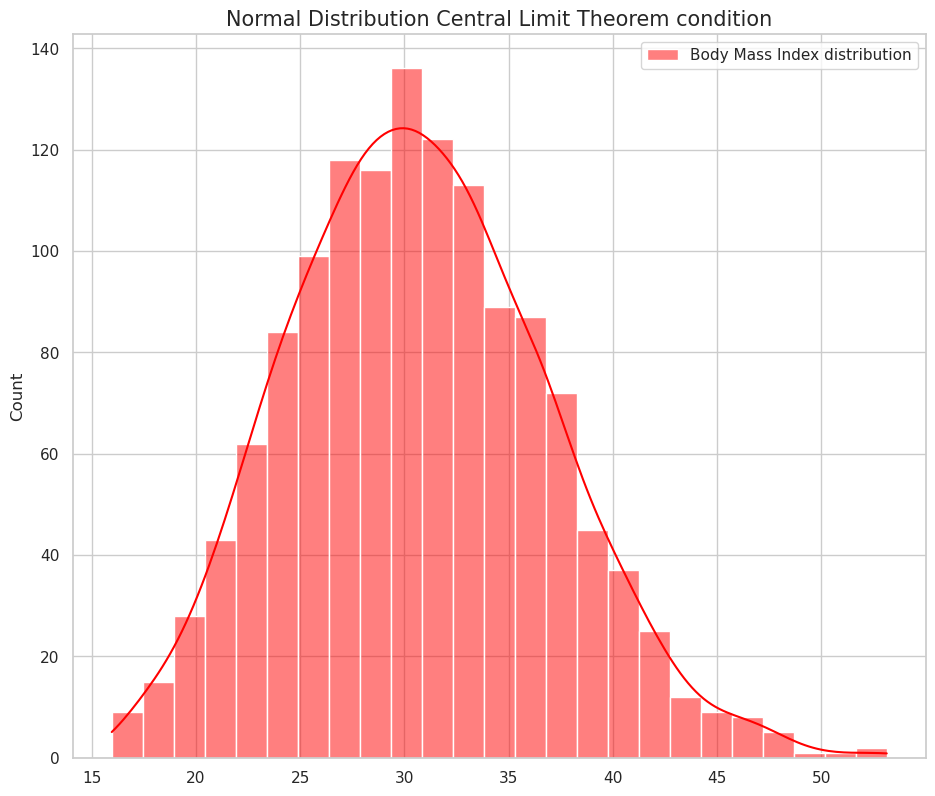

In [17]:
bmi = df['bmi'].values.tolist()

sns.histplot(
    bmi, 
    color='red', 
    kde=True,  
    label='Body Mass Index distribution'
);
plt.title('Normal Distribution Central Limit Theorem condition', fontsize = 15);
plt.legend(loc='upper right');

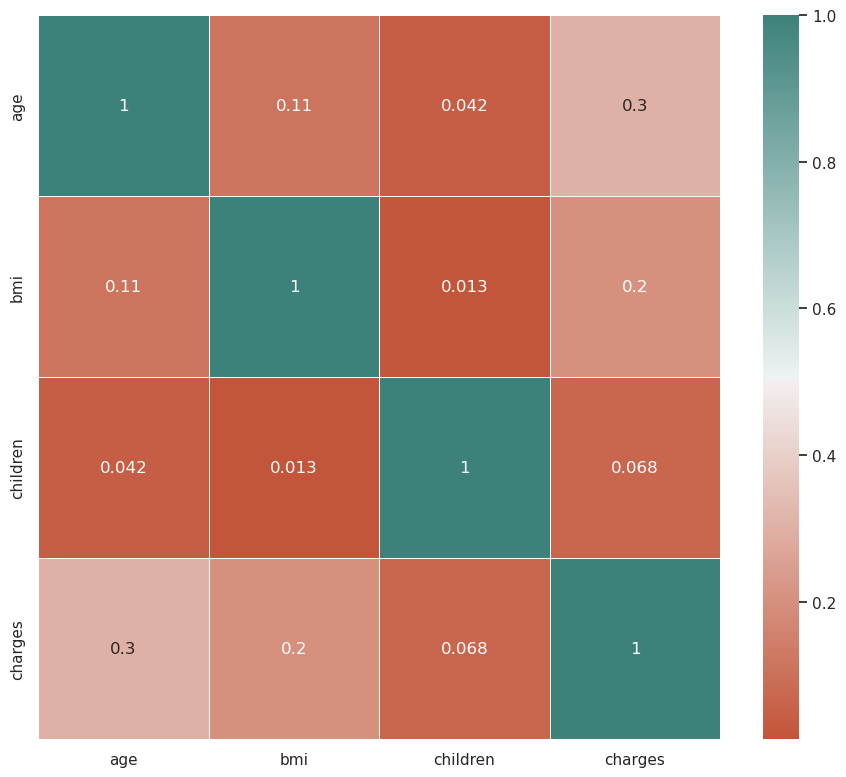

In [18]:

sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    linewidths=0.5, 
    cmap=sns.diverging_palette(20,180, as_cmap=True),
    linecolor='white'
);

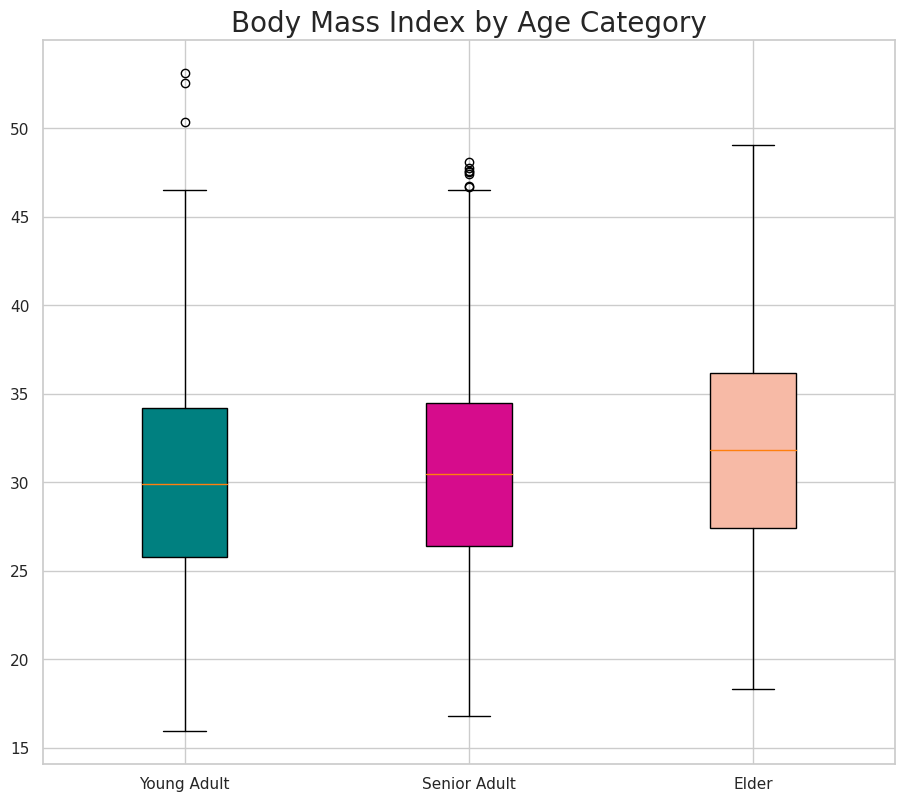

In [19]:
young_adults = df['bmi'].loc[df['age_cat'] == 'Young Adult'].values
senior_adults = df['bmi'].loc[df['age_cat'] == 'Senior Adult'].values
elders = df['bmi'].loc[df['age_cat'] == 'Elder'].values

data_to_plot = [young_adults, senior_adults, elders]
labels = ['Young Adult', 'Senior Adult', 'Elder']

colors = [(0/255, 128/255, 128/255), (214/255, 12/255, 140/255), (247/255, 186/255, 166/255)]

fig, ax = plt.subplots()

bp=ax.boxplot(data_to_plot, labels=labels, patch_artist=True);
plt.title('Body Mass Index by Age Category', fontsize = 20);


for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)

### Comparing independent categorical Variables (ANOVA)
* **P-value:** The p-value being heigher than 0.05 tell us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it come to Body Mass Index.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

(
    ols(
        formula='bmi ~ age_cat',
        data=df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Fri, 17 May 2024   Prob (F-statistic):            0.00268
Time:                        22:48:53   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  31.7393      0.413     76.776      0.000      30.928      32.550
age_cat[T.Senior Adult]    -0.9202      0.488     -1.885      0.060      -1.878       0.037
age_cat[T.Young Adult]     -1.6295      0.485     -3.360      0.001      -2.581      -0.678
==============================================================================
Omnibus:                       19.635   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.284
Skew:                           0.301   Prob(JB):                     3.94e-05
Kurtosis:                       2.981   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


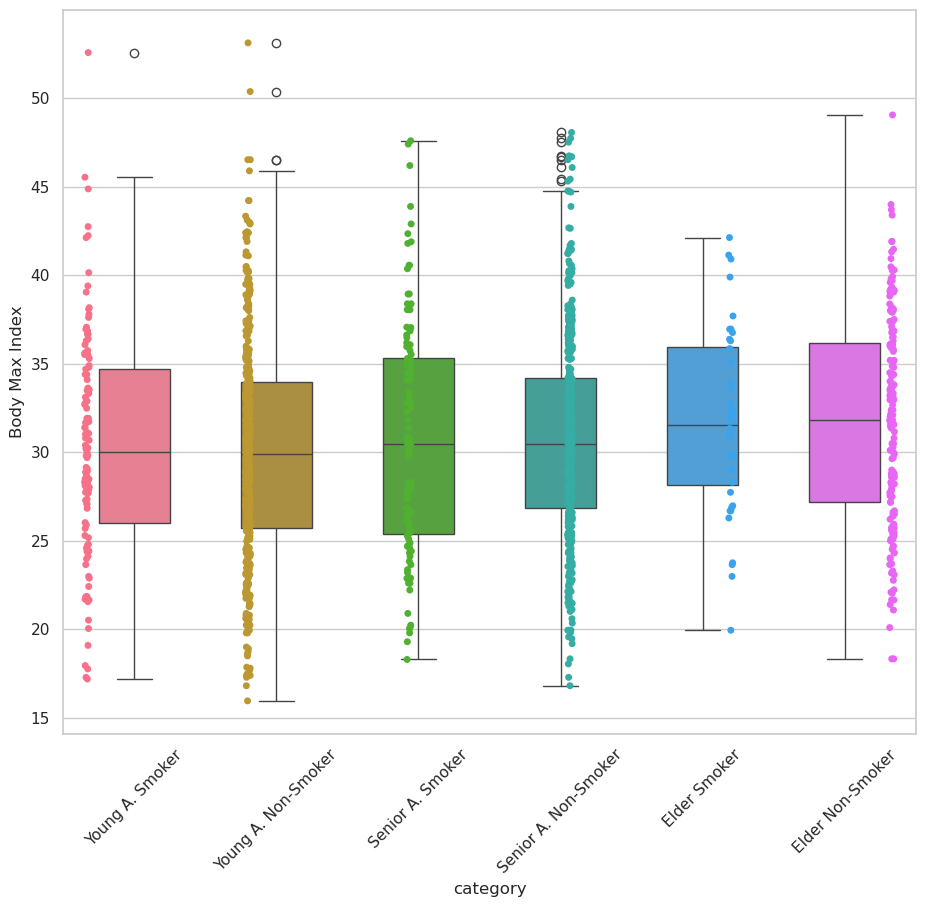

In [38]:
ya_smoker = df['bmi'].loc[(df['age_cat'] == 'Young Adult') & (df['smoker']== 'yes')].values
sa_smoker = df['bmi'].loc[(df['age_cat'] == 'Senior Adult') & (df['smoker']== 'yes')].values
e_smoker = df['bmi'].loc[(df['age_cat'] == 'Elder') & (df['smoker']== 'yes')].values

ya_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Young Adult') & (df['smoker']== 'no')].values
sa_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Senior Adult') & (df['smoker']== 'no')].values
e_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Elder') & (df['smoker']== 'no')].values

categories = ['Young A. Smoker', 'Young A. Non-Smoker', 'Senior A. Smoker', 'Senior A. Non-Smoker', 'Elder Smoker', 'Elder Non-Smoker']

y0 = ya_smoker
y1 = ya_nonsmoker
y2 = sa_smoker
y3 = sa_nonsmoker
y4 = e_smoker
y5 = e_nonsmoker

values = [y0, y1, y2, y3, y4, y5]

df_plot = pd.DataFrame()

for category, value in zip(categories, values):
    df_temp = pd.DataFrame({'category': category, 'Body Max Index': value})
    df_plot = pd.concat([df_plot, df_temp])



sns.boxplot(data = df_plot, x='category', y='Body Max Index', width=0.5,palette='husl' );
plt.xticks(rotation=45);
sns.stripplot(data = df_plot, x='category', y='Body Max Index', palette='husl', dodge=True);
